In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from sympy import *

In [2]:
def make_system(params,t_0,t_end, supply_func):
    """Make a system object for the RLEV model.
    
    params(R, L, C): Circuit component values
    
    t_0: Beginning time in seconds
    t_end: Ending time in seconds
    
    returns: System object
    """
    # Start with a number of active, uninfected cells and virons, but no infected cells of any kind
    init = State(Vout=0,dVoutdt=0)
    
    #Get our input waveform function
    Vin = supply_func
    
    #Get our parameters
    R,L,C = params    

    return System(R=R, L=L, C=C, Vin = Vin,
                  t_0=t_0, t_end=t_end, init=init)

In [3]:
def v_source_func(omega = 1, A = 1, phi = 0):
    """
    Defines the source voltage function as a sinusoidal wave changing with respect to time
    Parameters:
        t: Single value representing time, or array of time steps
        A: Amplitude of the sine wave, assumed equal to 1
        phi: Phase shift of the wave, assumed equal to 0
    Returns:
        The function of a standard sine wave A*sin(w*t+phi) with the given parameters
    """
    def v_source(t, omega = omega, A = A, phi = phi):
        return A * np.sin(omega * 6.28 * t + phi)
    
    return v_source

In [4]:
def slope_func(state, t, system):
    """Update the model.
    
    state: State (Vout, dVoutdt)
    t: time
    system: System object
    
    returns: State (dVoutdt, d2Voutdt2)
    """
    Vout, dVoutdt = state
    unpack(system)
    
    d2Voutdt2 = 1/(L*C) * (abs(Vin(t)) - (L/R)*dVoutdt - Vout)
    dVoutdt = (R/L) * (abs(Vin(t)) - (L*C)*d2Voutdt2 - Vout)
    
    return dVoutdt, d2Voutdt2

In [5]:
params = Params(R = 1e3,
               C = 30e-3,
               L = 2.2e-3)

,values
R,1000.0000
C,0.0300
L,0.0022


In [7]:
# Make a system to run for 120 days
system = make_system(params,0,5,v_source_func(60,170,0))
%time results, details = run_ode_solver(system,slope_func,max_step=1e-4);
details.message

Wall time: 1min 11s


'The solver successfully reached the end of the integration interval.'

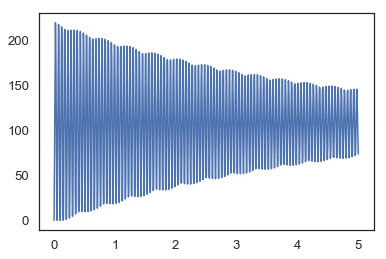

In [8]:
results.Vout.plot()